# Limpieza e inspección de los datos
Para organizar nuestro notebook (script), dedicaremos la celda inicial a la carga de librerías necesarias para la ejecución del script completo. Si necesitamos instalar algunas de ellas porque no estén disponibles en nuestro repositorio, las instalaremos y dejaremos indicado que hemos necesitado instalarlas. Esto servirá para la configuración del entorno de trabajo de futuros proyectos. :)

El notebook está esturcturado como sigue:

- Bloque A: carga de datos.
- Bloque B: inspección de datos.
- Bloque C: limpieza y adecuación.
- Bloque D: visualización.
- Bloque E: exportación del conjunto resultante. 

## Librerías

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud, STOPWORDS

from langdetect import detect

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

## BLOQUE A: Carga de los datos

**Pandas**: librería más popular de python  que proporciona las herramientas y estructuras necesarias para manipular y analizar datos.
La estructura básica de Pandas es el **DataFrame**, una colección ordenada de columnas con nombres y tipos, donde una sola fila representa un único caso (observación) y las columnas representan atributos particulares.

Guía: https://pandas.pydata.org/docs/getting_started/index.html

In [2]:
# Leemos el CSV que contiene los datos y lo cargamos en memoria
df = pd.read_csv('../data/Airlines_tweets.csv')

## BLOQUE B: inspección de los datos
El objetivo de la inspección es la familiarización con el conjunto de datos. Algunas preguntas iniciales que podría estar bien hacerse pueden ser:

- ¿En qué tipo de objeto están almacenados los datos? ¿Cuál es su dimensión?
- ¿Hay datos ausentes?
- ¿Que tipos diferentes de datos hay?
- ...

In [3]:
# Para ver el tipo de objeto con el que estamos trabajando
type(df)

pandas.core.frame.DataFrame

In [4]:
# Dimensiones del dataframe
df.shape

(14640, 15)

In [5]:
# Otra manera más interesante de proporcionar la misma información anterior
print(f"Hay un dataframe de {df.shape[0]} filas y {df.shape[1]} columnas.")

Hay un dataframe de 14640 filas y 15 columnas.


In [6]:
# Resumen conciso del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
# Información descriptiva de las variables numéricas
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
# Mostrar las primeras 5 filas
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
# Mostrar las últimas 5 filas
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


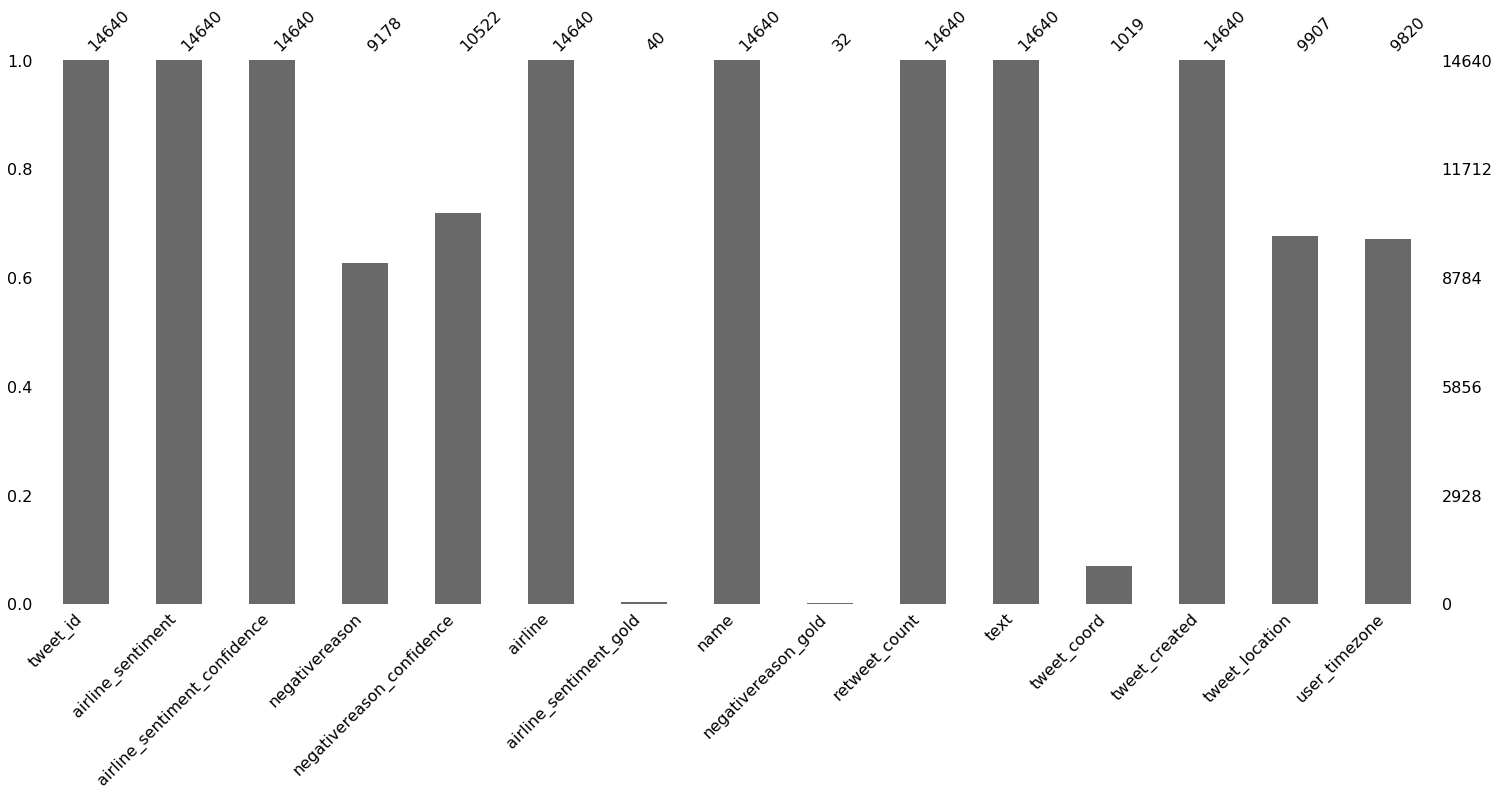

In [10]:
# Gráfico para ver valores faltantes
msno.bar(df)


## BLOQUE C: limpieza y adecuación
Algunos aspectos a tratar en este bloque son:

- Ausencias: eliminaremos las columnas con valores faltantes.
- Elimnaremos también las columnas que no son utiles a nuestro objetivo (tweet_id, tweet_created)
- Texto: limpieza y adecuación del texto

In [11]:
# Eliminación de columnas/variables que contengan datos ausentes
df = df.dropna(axis=1) 

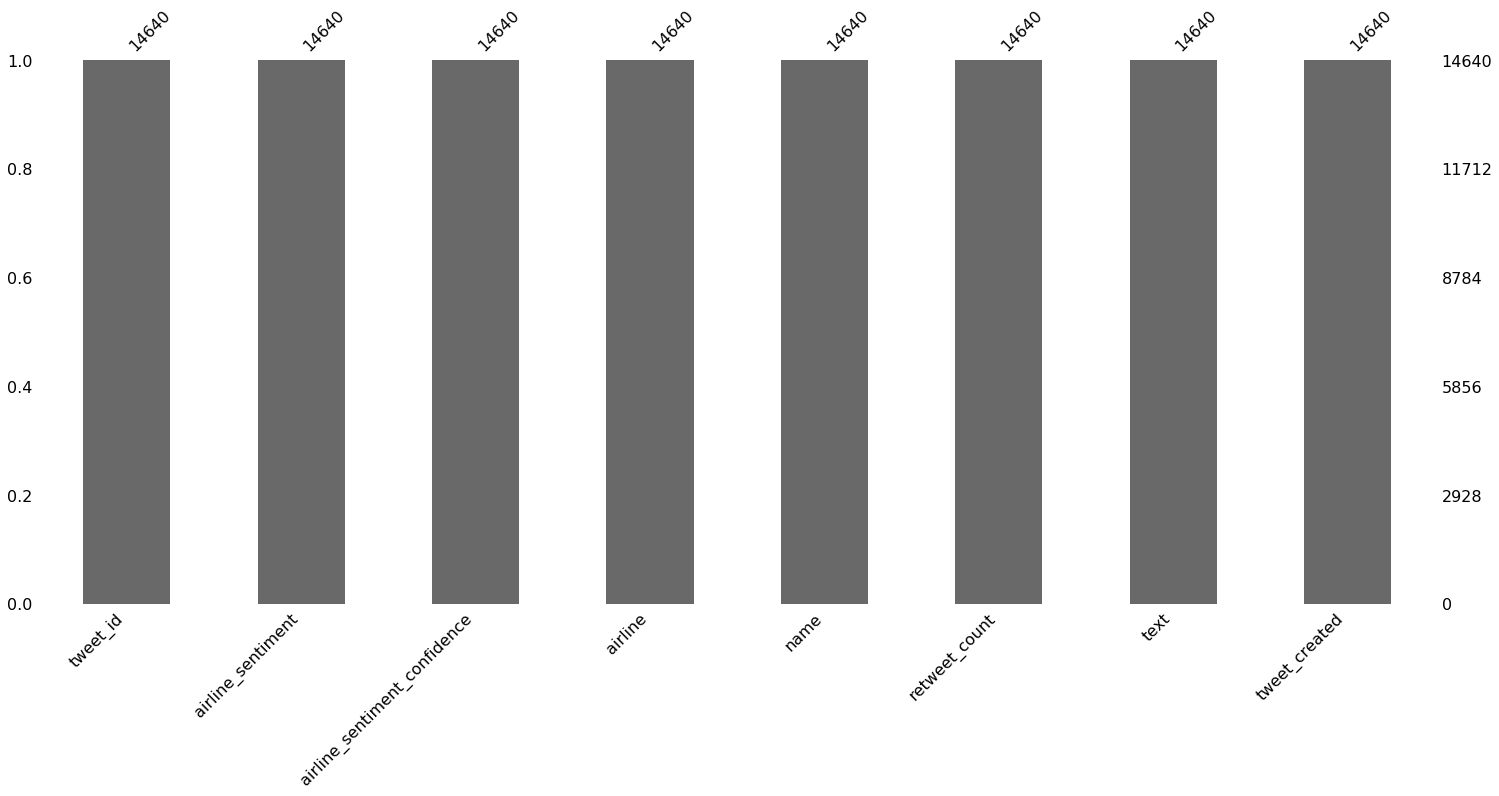

In [12]:
# Comprobación de eliminación de datos ausentes
msno.bar(df)

In [13]:
# Eliminación de columnas que no son útiles para el posterior modelado.
# Nos quedaremos solo con 'airline_sentiment', 'airline', y 'text'.
df = df.drop(columns=['tweet_id', 'tweet_created','airline_sentiment_confidence',
                      'name','retweet_count'])

In [14]:
# Detección del idioma en el que está escrito cada tweet
df['language'] = df['text'].apply(detect)

In [15]:
# ¿En que idioma están escritos los tweets? ¿Cuantos tweets tenemos para cada idioma?
df['language'].value_counts()

en    14448
fr       69
da       25
af       25
so       11
it       11
cy       10
nl        7
de        6
tr        4
ro        4
no        3
et        3
es        3
id        3
pt        2
pl        1
sq        1
fi        1
sv        1
tl        1
ca        1
Name: language, dtype: int64

In [16]:
# Nos quedamos con aquellos que están escritos únicamente en inglés
df = df[df['language']=='en']

In [17]:
# Comprobamos las dimensiones actuales del dataframe
df.shape

(14448, 4)

## BLOQUE D: visualización
En este bloque utilizaremos las librerias [matplotlib](https://matplotlib.org/) y [seaborn](https://seaborn.pydata.org/) para crear unas sencillas representaciones de los datos a modo general y descriptivo, mientras que para nos ayudaremos de la librería [wordcloud](https://amueller.github.io/word_cloud/) para poder crear visualizaciones acerca de los textos que vamos a analizar.

### Distribución de algunas variables

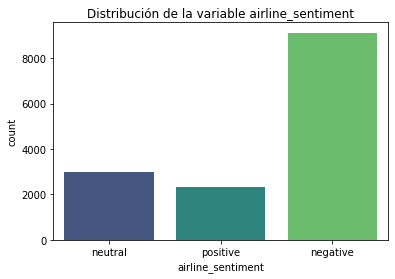

In [18]:
# Gráfico de barras para la variable airline_sentiment
sns.countplot(x='airline_sentiment', palette='viridis', data=df)
plt.title('Distribución de la variable airline_sentiment')
plt.show()

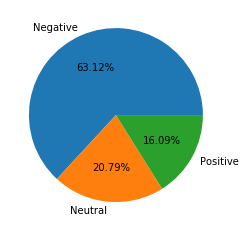

In [19]:
# Gráfico 'pie' con porcentajes para la variable objetivo airline_sentiment
plt.pie(df['airline_sentiment'].value_counts(), autopct="%.2f%%", labels=['Negative', 'Neutral', 'Positive'])
plt.show()

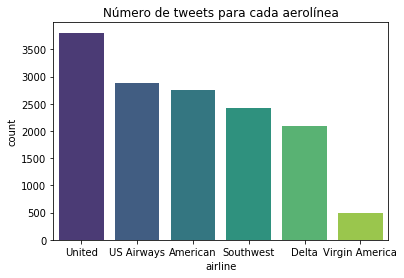

In [20]:
# Gráfico de barras para la variable airline
sns.countplot(data=df, x='airline', palette='viridis', order=df['airline'].value_counts().index)
plt.title('Número de tweets para cada aerolínea')
plt.show()

Toda la información aquí presentada de modo separado puede ser ensamblada en un solo gráfico. En las siguientes celdas vemos algunos ejemplos:

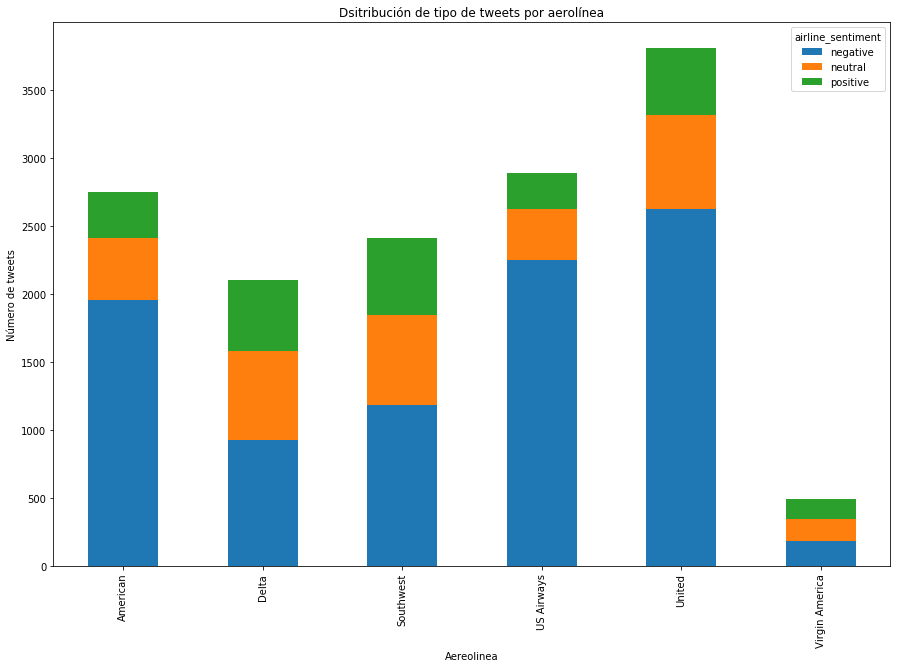

In [21]:
# Distribución de 'airline_sentiment' por cada aerolínea. 
# En este caso, utilizamos gráficos que ya están incluidos en el objeto dataframe.
plot = df[['airline', 'airline_sentiment']].value_counts()
plot.unstack().plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Dsitribución de tipo de tweets por aerolínea')
plt.xlabel('Aereolinea')
plt.ylabel('Número de tweets')
plt.show()

### Distibución del número de palabras por tweet

In [23]:
# Calculamos el número de palabras en cada tweet
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df[['text','word_count']].head(5)

,text,word_count
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


In [24]:
# Distribución del número de palabras
df.word_count.describe()

count    14448.000000
mean        17.811254
std          6.781607
min          2.000000
25%         13.000000
50%         19.000000
75%         23.000000
max         36.000000
Name: word_count, dtype: float64

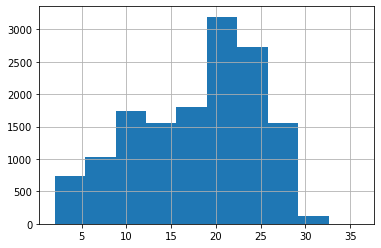

In [25]:
# Histograma de la distribución de palabras por tweet.
# Nuevamente, utilizamos los histogramas proporcionados por el propio dataframe.
df['word_count'].hist()

#### Histograma de la distribución del número de caracteres por tweet

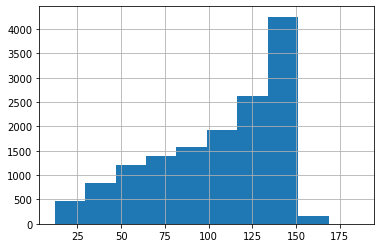

In [26]:
df['text'].str.len().hist()

### Representación de las palabras más comunes
- Consideraremos solo los tweets asociados a un sentimiento positivo o negativo.
- Para cada caso, representaremos gráficamente las palabras más comunes (más apariciones).

In [27]:
# Filtramos el conjunto de datos para quedarnos solo con los tweets positivos
positivedata = df.loc[df['airline_sentiment']=='positive', 'text']

# Hacemos lo mismo esta vez con los tweets negativos
negdata = df.loc[df['airline_sentiment']=='negative', 'text']

In [28]:
# Función para poder realizar el gráfico
def wordcloud_draw(data, color, title):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=stopwords.words('english'),
                          background_color=color,
                          width=2500,height=2000).generate(words)
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis('off')

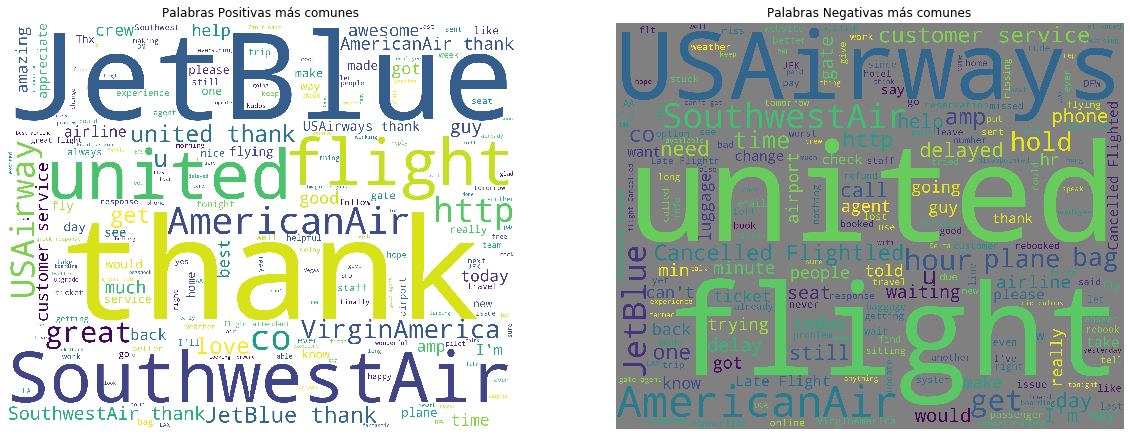

In [29]:
# Representamos los dos gráficos en una sola visualización
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
wordcloud_draw(positivedata,'white','Palabras Positivas más comunes')

plt.subplot(1,2,2)
wordcloud_draw(negdata, 'grey','Palabras Negativas más comunes')
plt.show()

## BLOQUE E: Exportación del conjunto resultante
En esta última fase exportamos y guardamos el conjunto de datos ya limpiado, procesado y adecuado. Solo guardaremos aquellas columnas que posteriormente nos serán útiles para crear y entrenar nuestro modelo de NLP.

In [30]:
# Eliminamos las columnas que ya no serán necesarias para el modelo
df = df.drop(columns=['airline', 'language', 'word_count'])

In [31]:
# Guardamos los datos ya procesados en un fichero csv
df.to_csv('../data/dataPrepared.csv', index=False)